<a href="https://colab.research.google.com/github/aayush1036/python_for_financial_analysis/blob/main/rolling_expanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


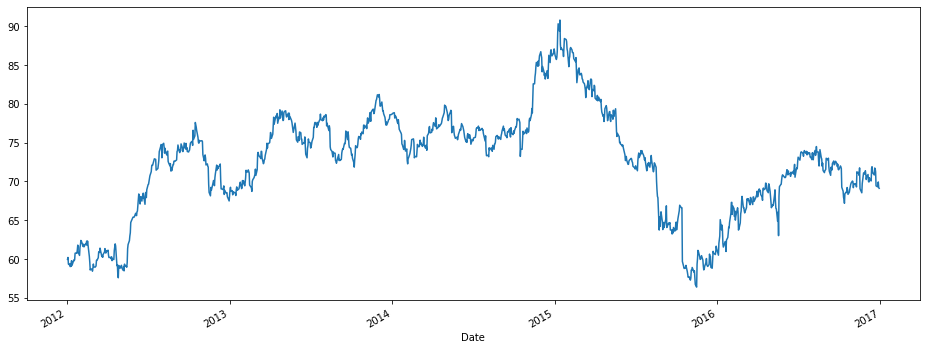

In [ ]:
df['Open'].plot(figsize=(16,6))

In [ ]:
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


Here we calculated the rolling average by week 

Benifits of using rollling average is that the data becomes less noisy and becomes more reflective of the trend of the actual data

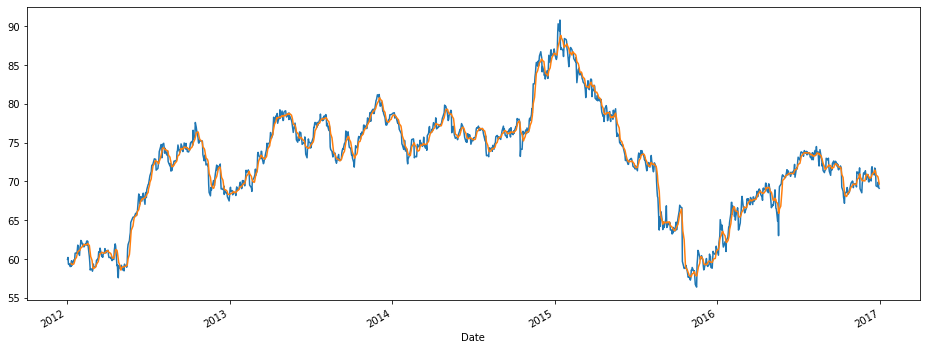

In [ ]:
df['Open'].plot()
df.rolling(window=7).mean()['Close'].plot(figsize=(16,6))

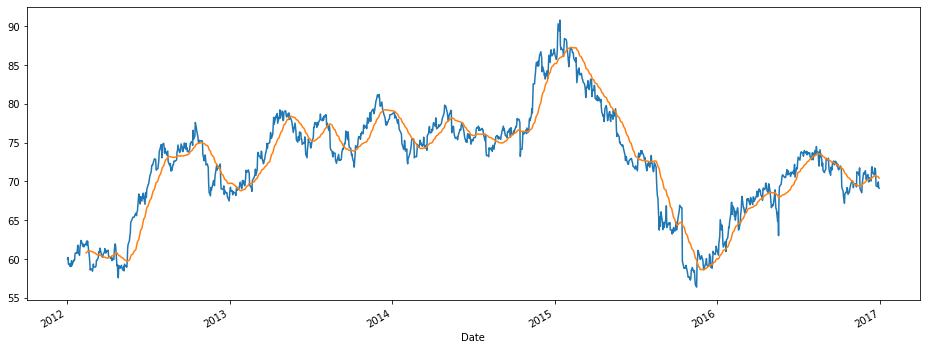

In [ ]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

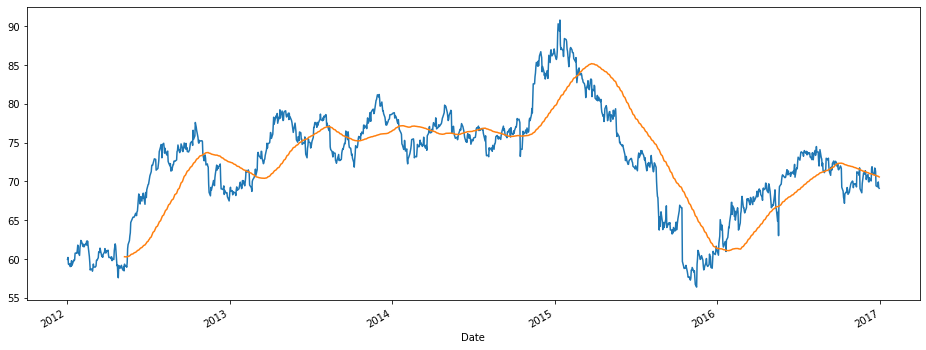

In [ ]:
df['Open'].plot()
df.rolling(window=90).mean()['Close'].plot(figsize=(16,6))

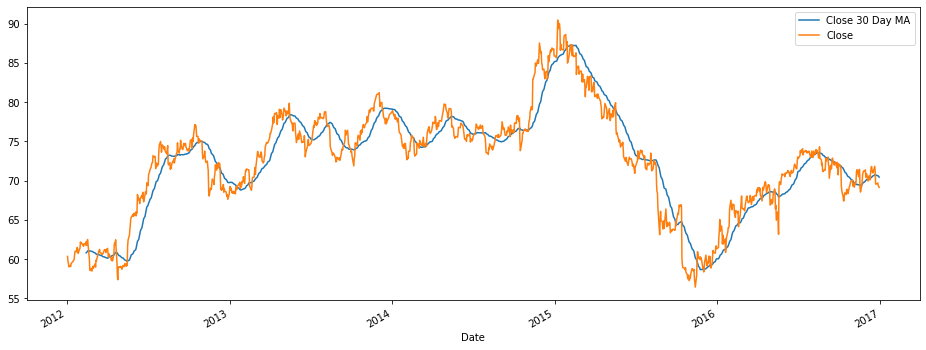

In [ ]:
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

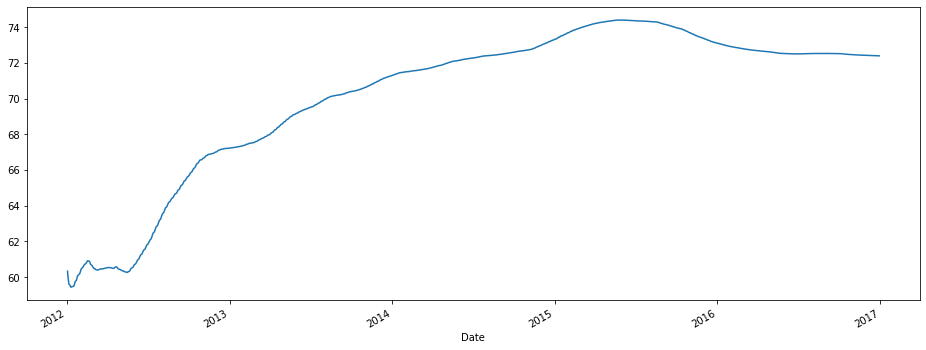

In [ ]:
# If we do not want to take into account the 7 day or 30 day period but we want to take into account
# everything which happened since the begining of the time series, we use the expanding method

df['Close'].expanding().mean().plot(figsize=(16,6))

Bollinger bands - Volatility bands placed above and below a moving average where the volatility is based on standard deviation which changes as volatility increases or decreases and the bands will automatically widen as the volatility increases and vice versa and the dynamic nature of the Bollinger bands also means that they can be used on diffrerent securities with standard settings. 

So for signals they can be used to determine the tops and bottoms or to determine the strength of the actual trend 

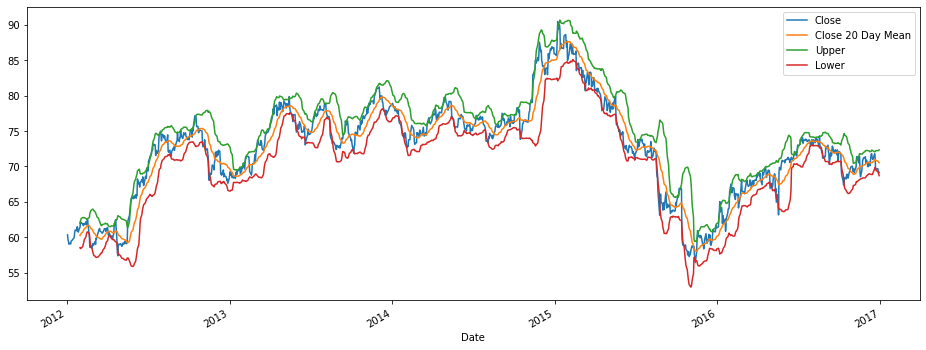

In [ ]:
# To create the bollinger band 
# Create 3 columns 
# closing price 20 day moving average 
df['Close 20 Day Mean'] = df['Close'].rolling(20).mean()
# Upper band = 20MA + 2*std(20)
df['Upper'] = df['Close 20 Day Mean']+2*(df['Close'].rolling(20).std())
# Lower band = 20MA - 2*std(20)
df['Lower'] = df['Close 20 Day Mean']-2*(df['Close'].rolling(20).std())


df[['Close', 'Close 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))

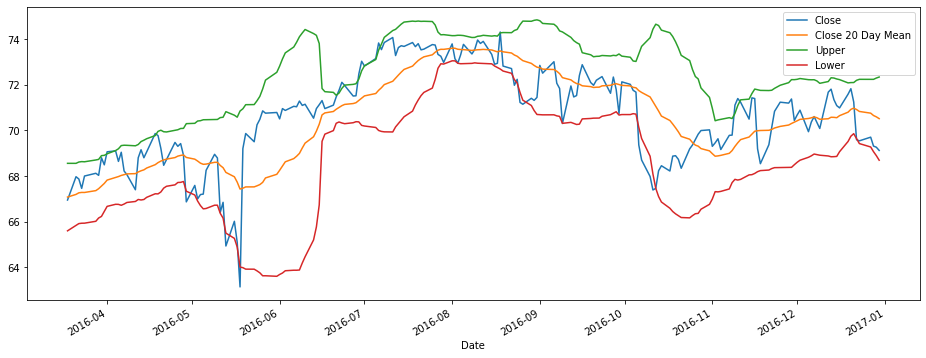

In [ ]:
# Plotting last 200 days (zooming in), we can also use indexing
df[['Close', 'Close 20 Day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16,6))